In [41]:
import polars
display(polars.__version__)

from cell_profiler import cell_profiler as cp
%start_cell_profiler

'0.17.10'

'Profiling enabled'

In [41] used -2.1 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 10%), peaked 0.0 MiB above final usage, current RAM usage now 1872.3 MiB


In [56]:
import os
import glob

DATA_FOLDER = '/home/ian/workspace/data/anonymised_mot_tests'
DATA_FOLDER = os.path.join(DATA_FOLDER, 'test_result_2021')
#DATA_FOLDER

files = glob.glob(DATA_FOLDER+"/test_result_*.csv")
filename = files[0]
DATA_FOLDER, files

('/home/ian/workspace/data/anonymised_mot_tests/test_result_2021',
 ['/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32355.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32361.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32372.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32367.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32365.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32386.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32357.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32378.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_

In [56] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 2518.9 MiB


In [57]:
#filename = 'test_result_2021/test_result_20220531131730_32355.csv'
df = polars.read_csv(filename)
df.shape
# try_parse_dates: bool = False,

(3362528, 14)

In [57] used 554.0 MiB RAM in 0.42s (system mean cpu 37%, single max cpu 46%), peaked 0.0 MiB above final usage, current RAM usage now 3072.9 MiB


In [4]:
f"{df.estimated_size():,}" # estimate given underlying buffers

'523,458,575'

In [4] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 1062.4 MiB


In [5]:
df.schema

{'test_id': Int64,
 'vehicle_id': Int64,
 'test_date': Utf8,
 'test_class_id': Int64,
 'test_type': Utf8,
 'test_result': Utf8,
 'test_mileage': Int64,
 'postcode_area': Utf8,
 'make': Utf8,
 'model': Utf8,
 'colour': Utf8,
 'fuel_type': Utf8,
 'cylinder_capacity': Int64,
 'first_use_date': Utf8}

In [5] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 1062.4 MiB


In [6]:
df.dtypes

[Int64,
 Int64,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Utf8]

In [6] used 0.0 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 20%), peaked 0.0 MiB above final usage, current RAM usage now 1062.4 MiB


In [7]:
df.head()

test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
i64,i64,str,i64,str,str,i64,str,str,str,str,str,i64,str
1488085241,298646303,"""2021-01-01""",4,"""NT""","""P""",113094,"""PO""","""VOLKSWAGEN""","""CADDY""","""WHITE""","""DI""",1598,"""2013-01-01"""
1360139783,1372832822,"""2021-01-01""",4,"""NT""","""P""",146500,"""LU""","""VAUXHALL""","""ASTRA""","""BLUE""","""DI""",1686,"""2006-09-29"""
1232194325,152373223,"""2021-01-01""",4,"""NT""","""F""",96459,"""DE""","""VAUXHALL""","""MOKKA""","""WHITE""","""DI""",1686,"""2013-04-27"""
464521577,17056716,"""2021-01-01""",4,"""NT""","""P""",201104,"""B""","""HONDA""","""JAZZ""","""BLACK""","""PE""",1339,"""2005-10-31"""
848357951,888720926,"""2021-01-01""",4,"""NT""","""P""",160067,"""IP""","""PEUGEOT""","""407""","""RED""","""DI""",1997,"""2007-06-29"""


In [7] used 0.0 MiB RAM in 0.10s (system mean cpu 8%, single max cpu 27%), peaked 0.0 MiB above final usage, current RAM usage now 1062.4 MiB


In [8]:
df.describe()

describe,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
str,f64,f64,str,f64,str,str,f64,str,str,str,str,str,f64,str
"""count""",3.362528e6,3.362528e6,"""3362528""",3.362528e6,"""3362528""","""3362528""",3.362528e6,"""3362528""","""3362528""","""3362528""","""3362528""","""3362528""",3.362528e6,"""3362528"""
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""",25204.0,"""0""","""0""","""0""","""0""","""0""",8150.0,"""0"""
"""mean""",1.0002e9,7.5034e8,null,4.026887,null,null,74144.397808,null,null,null,null,null,1711.88879,null
"""std""",5.7710e8,4.3304e8,null,0.620686,null,null,48751.326987,null,null,null,null,null,604.104353,null
"""min""",485.0,290.0,"""2021-01-01""",1.0,"""ES""","""ABA""",1.0,"""AB""",""".""",""" 570S""","""BEIGE""","""CN""",0.0,"""0004-02-20"""
"""max""",2.0000e9,1.5000e9,"""2021-12-30""",7.0,"""RT""","""PRS""",9.99999e5,"""ZE""","""ZY MOTOR""","""yfz350 banshee…","""YELLOW""","""ST""",50007.0,"""2021-12-21"""
"""median""",1.0001e9,7.5037e8,null,4.0,null,null,65653.0,null,null,null,null,null,1598.0,null
"""25%""",5.00630541e8,3.75504745e8,null,4.0,null,null,37624.0,null,null,null,null,null,1349.0,null
"""75%""",1.4998e9,1.1255e9,null,4.0,null,null,100763.0,null,null,null,null,null,1995.0,null


In [8] used 6.8 MiB RAM in 0.31s (system mean cpu 67%, single max cpu 100%), peaked 244.4 MiB above final usage, current RAM usage now 1069.2 MiB


In [9]:
df['fuel_type'].value_counts().sort(by='counts')

fuel_type,counts
str,u32
"""LN""",1
"""ST""",2
"""GD""",7
"""GA""",13
"""CN""",16
"""FC""",60
"""GB""",90
"""ED""",1013
"""LP""",1106


In [9] used 35.4 MiB RAM in 0.22s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 1104.5 MiB


In [10]:
%time df['fuel_type'].value_counts(sort=True)

CPU times: user 315 ms, sys: 18.6 ms, total: 334 ms
Wall time: 44.7 ms


fuel_type,counts
str,u32
"""PE""",1762204
"""DI""",1537930
"""HY""",48346
"""EL""",9372
"""OT""",2368
"""LP""",1106
"""ED""",1013
"""GB""",90
"""FC""",60


In [10] used 7.0 MiB RAM in 0.15s (system mean cpu 19%, single max cpu 36%), peaked 0.0 MiB above final usage, current RAM usage now 1111.5 MiB


In [11]:
ser=df['fuel_type']
ser.value_counts?

In [11] used 0.6 MiB RAM in 0.12s (system mean cpu 7%, single max cpu 23%), peaked 0.0 MiB above final usage, current RAM usage now 1112.1 MiB


Signature: ser.value_counts(*, sort: 'bool' = False) -> 'DataFrame'
Docstring:
Count the unique values in a Series.

Parameters
----------
sort
    Ensure the output is sorted from most values to least.

Examples
--------
>>> s = pl.Series("a", [1, 2, 2, 3])
>>> s.value_counts().sort(by="a")
shape: (3, 2)
┌─────┬────────┐
│ a   ┆ counts │
│ --- ┆ ---    │
│ i64 ┆ u32    │
╞═════╪════════╡
│ 1   ┆ 1      │
│ 2   ┆ 2      │
│ 3   ┆ 1      │
└─────┴────────┘
File:      ~/miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/polars/series/series.py
Type:      method

In [12]:
import matplotlib.pyplot as plt

In [12] used 35.9 MiB RAM in 0.36s (system mean cpu 40%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1148.0 MiB


In [13]:
counts = df['fuel_type'].value_counts(sort=True)

In [13] used 2.6 MiB RAM in 0.15s (system mean cpu 30%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 1150.6 MiB


In [14]:
type(counts)

polars.dataframe.frame.DataFrame

In [14] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 1150.6 MiB


In [15]:
counts.to_numpy()

array([['PE', 1762204],
       ['DI', 1537930],
       ['HY', 48346],
       ['EL', 9372],
       ['OT', 2368],
       ['LP', 1106],
       ['ED', 1013],
       ['GB', 90],
       ['FC', 60],
       ['CN', 16],
       ['GA', 13],
       ['GD', 7],
       ['ST', 2],
       ['LN', 1]], dtype=object)

In [15] used 53.2 MiB RAM in 0.33s (system mean cpu 8%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1203.8 MiB


In [16]:
counts.to_pandas().set_index('fuel_type')

,counts
fuel_type,
PE,1762204
DI,1537930
HY,48346
EL,9372
OT,2368
LP,1106
ED,1013
GB,90
FC,60


In [16] used 1.8 MiB RAM in 0.11s (system mean cpu 5%, single max cpu 30%), peaked 0.0 MiB above final usage, current RAM usage now 1205.6 MiB


<AxesSubplot: xlabel='fuel_type'>

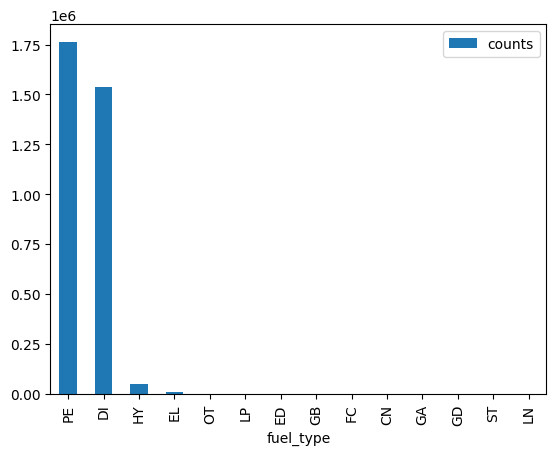

In [17] used 6.0 MiB RAM in 0.21s (system mean cpu 13%, single max cpu 100%), peaked 0.5 MiB above final usage, current RAM usage now 1211.6 MiB


In [17]:
counts.to_pandas().set_index('fuel_type').plot(kind='bar')

In [18]:
#%time df.query('test_mileage > 900000')

In [18] used 0.0 MiB RAM in 0.10s (system mean cpu 2%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 1211.6 MiB


In [19]:
import polars as pl
# why will this include 'null' in the result?
df.select([pl.col('test_mileage') > 900000])

test_mileage
bool
false
false
false
false
false
false
false
false
false


In [19] used 0.0 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 80%), peaked 0.0 MiB above final usage, current RAM usage now 1211.6 MiB


In [20]:
# use filter to cut down, select a column and value to filter, use e.g. (pl.col(...)>...)&(pl.col(...)<...) to do multiple
%time df.filter(pl.col('test_mileage') > 900000)

CPU times: user 17.4 ms, sys: 5.19 ms, total: 22.6 ms
Wall time: 4.48 ms


test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
i64,i64,str,i64,str,str,i64,str,str,str,str,str,i64,str
1108568485,1224975303,"""2021-01-07""",5,"""NT""","""P""",985643,"""L""","""DAF""","""UNCLASSIFIED""","""MULTI-COLOUR""","""DI""",5900,"""2006-04-11"""
672464823,113771524,"""2021-01-08""",4,"""NT""","""F""",999999,"""EX""","""PEUGEOT""","""406""","""MAROON""","""PE""",1997,"""2012-01-16"""
164383885,442025378,"""2021-01-11""",4,"""RT""","""P""",915321,"""MK""","""VAUXHALL""","""COMBO""","""WHITE""","""DI""",1686,"""2007-12-31"""
1764557687,1440326550,"""2021-01-12""",7,"""NT""","""P""",956596,"""IP""","""LDV""","""MAXUS""","""SILVER""","""DI""",2499,"""2007-07-27"""
786258681,1405447220,"""2021-01-13""",7,"""RT""","""P""",948958,"""PL""","""LDV""","""MAXUS""","""RED""","""DI""",2500,"""2008-04-10"""
1276539759,300999080,"""2021-01-13""",4,"""NT""","""P""",951907,"""NN""","""FORD""","""C-MAX""","""BLACK""","""DI""",1560,"""2012-03-15"""
1569668323,527217578,"""2021-01-15""",4,"""NT""","""F""",999999,"""BN""","""ROVER""","""75""","""GOLD""","""DI""",1951,"""2005-01-25"""
876081953,58887022,"""2021-01-18""",4,"""RT""","""P""",911030,"""SK""","""VAUXHALL""","""INSIGNIA""","""BLACK""","""PE""",1796,"""2011-03-01"""
1639215517,237535366,"""2021-01-18""",7,"""NT""","""F""",924364,"""DN""","""LDV""","""MAXUS""","""WHITE""","""DI""",2499,"""2005-06-30"""


In [20] used 1.4 MiB RAM in 0.11s (system mean cpu 4%, single max cpu 67%), peaked 0.0 MiB above final usage, current RAM usage now 1213.0 MiB


In [21]:
df.groupby(by='make').agg('cylinder_capacity')[:5]

make,cylinder_capacity
str,list[i64]
"""PEUGEOT 206 SW…",[1360]
"""FYM""","[233, 125]"
"""BRISTOL""","[6277, 6556, … 5900]"
"""VOLKSWAGEN GOL…",[1984]
"""DI-BLASI""","[49, 49, 49]"


In [21] used 26.4 MiB RAM in 0.16s (system mean cpu 12%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1239.4 MiB


In [22]:
df.lazy().groupby(by='make').agg('cylinder_capacity')

In [22] used 0.0 MiB RAM in 0.13s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1239.4 MiB


In [23]:
df.lazy().groupby(by='make').agg('cylinder_capacity').collect()[:5]

make,cylinder_capacity
str,list[i64]
"""QUAZZAR E-DIVI…","[null, null, null]"
"""ARIEL""","[497, 1998, … 1998]"
"""HARLEY-DAVIDSO…",[1690]
"""FURORE FORMULA…",[1441]
"""NOVA""",[1490]


In [23] used 18.3 MiB RAM in 0.20s (system mean cpu 14%, single max cpu 100%), peaked 8.5 MiB above final usage, current RAM usage now 1257.7 MiB


In [24]:
#        pl.col('Science').max().alias('Science(Max)')
#df.groupby(by='make').agg(pl.col('cylinder_capacity')).last()

In [24] used 0.0 MiB RAM in 0.10s (system mean cpu 3%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 1257.7 MiB


In [25]:
df.groupby(by='make').agg(pl.median('cylinder_capacity'))

make,cylinder_capacity
str,f64
"""VOLKSWAGEN GOL…",1390.0
"""GSR""",3500.0
"""UMM""",2498.0
"""TRIKING SPORT""",1064.0
"""AEC MILITANT""",11600.0
"""BMW 730LD M SP…",2993.0
"""AJS""",124.0
"""HUMMER H2""",6000.0
"""GMC YUKON XL""",5300.0


In [25] used 3.6 MiB RAM in 0.15s (system mean cpu 20%, single max cpu 100%), peaked 0.9 MiB above final usage, current RAM usage now 1261.2 MiB


In [26]:
# can't seem to use the same col twice! ah, name conflict!
df.groupby(by='make').agg([pl.col('cylinder_capacity').max(), pl.col('test_mileage').count()])

make,cylinder_capacity,test_mileage
str,i64,u32
"""RBS EVO""",1850,1
"""NISSAN""",15255,159375
"""LINTEX HT50QT-…",49,3
"""SCOMADI""",278,79
"""HARLEY-DAVIDSO…",1202,1
"""TIGER CAT E1""",2000,1
"""SAIC MOTOR""",2499,1
"""MGB""",1800,2
"""AK SPROTS CARS…",6300,1


In [26] used 0.6 MiB RAM in 0.15s (system mean cpu 15%, single max cpu 100%), peaked 2.0 MiB above final usage, current RAM usage now 1261.9 MiB


In [27]:
# pandas as leyland 9999, 27 size, but we get 27 size and median 108325 - we didn't filter nan here
df.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('test_mileage').median().alias('cyl_median')])\
.filter(pl.col('cyl_size')==1).sort(by='make')

make,cyl_size,cyl_median
str,u32,f64
""".""",1,17851.0
"""150 STAR""",1,719.0
"""1VECO""",1,325080.0
"""A M GERENAL""",1,10200.0
"""A.J.S.""",1,1492.0
"""A.K SPORTS AK…",1,347.0
"""A65GM FORD TRA…",1,27762.0
"""AC BUCKLAND""",1,52334.0
"""ADRIA MATRIX M…",1,8677.0


In [27] used 3.1 MiB RAM in 0.17s (system mean cpu 28%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1264.9 MiB


In [28]:
#df.filter(df.select(pl.col('cylinder_capacity').is_null()))

In [28] used 0.0 MiB RAM in 0.10s (system mean cpu 2%, single max cpu 33%), peaked 0.0 MiB above final usage, current RAM usage now 1265.0 MiB


## drop rows with nan cylinder capacity - how many left? does groupby do better?

In [29]:
df.select(pl.col('cylinder_capacity').is_null()).sum()

cylinder_capacity
u32
8150


In [29] used -3.7 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 100%), peaked 3.7 MiB above final usage, current RAM usage now 1261.3 MiB


In [30]:
df.shape

(3362528, 14)

In [30] used 0.0 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1261.3 MiB


In [31]:
mask = df.select(pl.col('cylinder_capacity').is_null())
mask.sum()

cylinder_capacity
u32
8150


In [31] used 0.0 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 1261.3 MiB


In [32]:
lf = df.lazy() # make lazyframe

In [32] used 0.0 MiB RAM in 0.10s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1261.3 MiB


In [33]:
lf.filter(pl.col('cylinder_capacity').is_not_null())

In [33] used 0.0 MiB RAM in 0.13s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1261.3 MiB


In [34]:
df_nonan_cylcap = lf.filter(pl.col('cylinder_capacity').is_not_null()).collect()
df_nonan_cylcap.shape

(3354378, 14)

In [34] used 583.9 MiB RAM in 0.27s (system mean cpu 31%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1845.3 MiB


In [35]:
# pandas as leyland 9999, 27 size, but we get 27 size and median 108325 - we didn't filter nan here
#df_nonan_cylcap.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('test_mileage').median().alias('cyl_median')])\
#.filter(pl.col('cyl_size')==1).sort(by='make')

In [35] used 0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 33%), peaked 0.0 MiB above final usage, current RAM usage now 1845.3 MiB


In [36]:
df_nonan_cylcap.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('cylinder_capacity').median().alias('cyl_med')])\
.filter(pl.col('cyl_size') > 10).sort(by='cyl_med')

make,cyl_size,cyl_med
str,u32,f64
"""TOMOS""",16,49.0
"""BEELINE""",17,49.0
"""BAOTIAN""",45,49.0
"""PUCH""",12,49.0
"""DIRECT BIKES""",111,49.0
"""EASY RIDER""",28,49.0
"""MALAGUTI""",13,49.0
"""CPI""",34,49.0
"""DERBI""",93,50.0


In [36] used -3.2 MiB RAM in 0.15s (system mean cpu 18%, single max cpu 100%), peaked 4.7 MiB above final usage, current RAM usage now 1842.1 MiB


In [37]:
%%time
# try same with DataFrame (not Lazy)

df.filter(pl.col('cylinder_capacity').is_not_null()) \
.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('cylinder_capacity').median().alias('cyl_med')])\
.filter(pl.col('cyl_size') > 10).sort(by='cyl_med')

CPU times: user 1.26 s, sys: 365 ms, total: 1.62 s
Wall time: 197 ms


make,cyl_size,cyl_med
str,u32,f64
"""MALAGUTI""",13,49.0
"""CPI""",34,49.0
"""BAOTIAN""",45,49.0
"""PUCH""",12,49.0
"""BEELINE""",17,49.0
"""TOMOS""",16,49.0
"""EASY RIDER""",28,49.0
"""DIRECT BIKES""",111,49.0
"""RIEJU""",93,50.0


In [37] used 36.1 MiB RAM in 0.30s (system mean cpu 29%, single max cpu 100%), peaked 516.2 MiB above final usage, current RAM usage now 1878.2 MiB


In [38]:
%%time
# try same with DataFrame (not Lazy)

df.lazy().filter(pl.col('cylinder_capacity').is_not_null()) \
.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('cylinder_capacity').median().alias('cyl_med')])\
.filter(pl.col('cyl_size') > 10).sort(by='cyl_med').collect()

CPU times: user 592 ms, sys: 65.8 ms, total: 658 ms
Wall time: 105 ms


make,cyl_size,cyl_med
str,u32,f64
"""CPI""",34,49.0
"""EASY RIDER""",28,49.0
"""BAOTIAN""",45,49.0
"""PUCH""",12,49.0
"""MALAGUTI""",13,49.0
"""BEELINE""",17,49.0
"""TOMOS""",16,49.0
"""DIRECT BIKES""",111,49.0
"""RIEJU""",93,50.0


In [38] used -3.8 MiB RAM in 0.21s (system mean cpu 14%, single max cpu 100%), peaked 71.7 MiB above final usage, current RAM usage now 1874.3 MiB


In [39]:
print(df.lazy().filter(pl.col('cylinder_capacity').is_not_null()) \
.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('cylinder_capacity').median().alias('cyl_med')])\
.filter(pl.col('cyl_size') > 10).sort(by='cyl_med').explain(optimized=True))

SORT BY [col("cyl_med")]
  FILTER [(col("cyl_size")) > (10)] FROM
  AGGREGATE
  	[col("cylinder_capacity").count().alias("cyl_size"), col("cylinder_capacity").median().alias("cyl_med")] BY [col("make")] FROM
  	DF ["test_id", "vehicle_id", "test_date", "test_class_id"]; PROJECT 2/14 COLUMNS; SELECTION: "col(\"cylinder_capacity\").is_not_null()"
In [39] used 0.0 MiB RAM in 0.10s (system mean cpu 3%, single max cpu 67%), peaked 0.0 MiB above final usage, current RAM usage now 1874.3 MiB


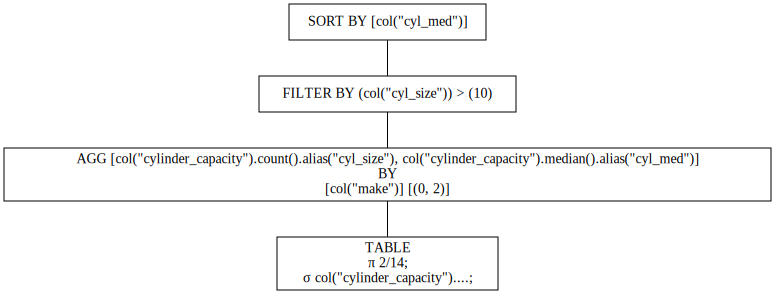

In [40] used 0.0 MiB RAM in 0.12s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1874.4 MiB


In [40]:
df.lazy().filter(pl.col('cylinder_capacity').is_not_null()) \
.groupby(by='make').agg([pl.col('cylinder_capacity').count().alias('cyl_size'), pl.col('cylinder_capacity').median().alias('cyl_med')])\
.filter(pl.col('cyl_size') > 10).sort(by='cyl_med').show_graph()

# Can we add a years-old column to our dataframe?

In [52]:
df.head()

test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
i64,i64,str,i64,str,str,i64,str,str,str,str,str,i64,str
1488085241,298646303,"""2021-01-01""",4,"""NT""","""P""",113094,"""PO""","""VOLKSWAGEN""","""CADDY""","""WHITE""","""DI""",1598,"""2013-01-01"""
1360139783,1372832822,"""2021-01-01""",4,"""NT""","""P""",146500,"""LU""","""VAUXHALL""","""ASTRA""","""BLUE""","""DI""",1686,"""2006-09-29"""
1232194325,152373223,"""2021-01-01""",4,"""NT""","""F""",96459,"""DE""","""VAUXHALL""","""MOKKA""","""WHITE""","""DI""",1686,"""2013-04-27"""
464521577,17056716,"""2021-01-01""",4,"""NT""","""P""",201104,"""B""","""HONDA""","""JAZZ""","""BLACK""","""PE""",1339,"""2005-10-31"""
848357951,888720926,"""2021-01-01""",4,"""NT""","""P""",160067,"""IP""","""PEUGEOT""","""407""","""RED""","""DI""",1997,"""2007-06-29"""


In [52] used -36.8 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 2482.2 MiB


In [62]:

df = df.with_columns([
    pl.col('test_date').str.strptime(
        pl.Date,
        format="%Y-%m-%d", strict=False
    ).alias("test_date_as_date"),
    pl.col('first_use_date').str.strptime(
        pl.Date,
        format="%Y-%m-%d", strict=False
    ).alias("first_use_date_as_date")
])
df.head()

test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,test_date_as_date,first_use_date_as_date
i64,i64,str,i64,str,str,i64,str,str,str,str,str,i64,str,date,date
1488085241,298646303,"""2021-01-01""",4,"""NT""","""P""",113094,"""PO""","""VOLKSWAGEN""","""CADDY""","""WHITE""","""DI""",1598,"""2013-01-01""",2021-01-01,2013-01-01
1360139783,1372832822,"""2021-01-01""",4,"""NT""","""P""",146500,"""LU""","""VAUXHALL""","""ASTRA""","""BLUE""","""DI""",1686,"""2006-09-29""",2021-01-01,2006-09-29
1232194325,152373223,"""2021-01-01""",4,"""NT""","""F""",96459,"""DE""","""VAUXHALL""","""MOKKA""","""WHITE""","""DI""",1686,"""2013-04-27""",2021-01-01,2013-04-27
464521577,17056716,"""2021-01-01""",4,"""NT""","""P""",201104,"""B""","""HONDA""","""JAZZ""","""BLACK""","""PE""",1339,"""2005-10-31""",2021-01-01,2005-10-31
848357951,888720926,"""2021-01-01""",4,"""NT""","""P""",160067,"""IP""","""PEUGEOT""","""407""","""RED""","""DI""",1997,"""2007-06-29""",2021-01-01,2007-06-29


In [62] used 25.6 MiB RAM in 0.16s (system mean cpu 13%, single max cpu 18%), peaked 0.0 MiB above final usage, current RAM usage now 3136.9 MiB


In [73]:
# get year from test_date_as_date
df = df.with_columns([df['test_date_as_date'].dt.year().alias('test_year'),
                      df['first_use_date_as_date'].dt.year().alias('first_use_year'),
                     (df['test_year']-df['first_use_year']).alias('years_old')])

#df.head()
#df = df.with_columns([])
df.head()

test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,test_date_as_date,first_use_date_as_date,test_year,first_use_year,years_old
i64,i64,str,i64,str,str,i64,str,str,str,str,str,i64,str,date,date,i32,i32,i32
1488085241,298646303,"""2021-01-01""",4,"""NT""","""P""",113094,"""PO""","""VOLKSWAGEN""","""CADDY""","""WHITE""","""DI""",1598,"""2013-01-01""",2021-01-01,2013-01-01,2021,2013,8
1360139783,1372832822,"""2021-01-01""",4,"""NT""","""P""",146500,"""LU""","""VAUXHALL""","""ASTRA""","""BLUE""","""DI""",1686,"""2006-09-29""",2021-01-01,2006-09-29,2021,2006,15
1232194325,152373223,"""2021-01-01""",4,"""NT""","""F""",96459,"""DE""","""VAUXHALL""","""MOKKA""","""WHITE""","""DI""",1686,"""2013-04-27""",2021-01-01,2013-04-27,2021,2013,8
464521577,17056716,"""2021-01-01""",4,"""NT""","""P""",201104,"""B""","""HONDA""","""JAZZ""","""BLACK""","""PE""",1339,"""2005-10-31""",2021-01-01,2005-10-31,2021,2005,16
848357951,888720926,"""2021-01-01""",4,"""NT""","""P""",160067,"""IP""","""PEUGEOT""","""407""","""RED""","""DI""",1997,"""2007-06-29""",2021-01-01,2007-06-29,2021,2007,14


In [73] used 38.7 MiB RAM in 0.18s (system mean cpu 12%, single max cpu 21%), peaked 0.0 MiB above final usage, current RAM usage now 3342.9 MiB


In [ ]:
#dfx['first_use_year'] = dfx['first_use_date'].dt.year

#fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
#dfx.plot(kind='scatter', x='first_use_year', y='test_mileage', alpha=0.5, ax=ax)
#set_commas(ax, y_axis=True)
#set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021")
#ax.set_xlim(xmin=1980)
#ax.set_ylim(ymax=400000)

In [78]:
#df[['years_old', 'test_mileage']].to_pandas()
#df[['years_old', 'test_mileage']].

AttributeError: 'DataFrame' object has no attribute 'plot'

In [78] used -0.1 MiB RAM in 0.12s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 3366.5 MiB


In [83]:
df.shape

(3362528, 19)

In [83] used 0.0 MiB RAM in 0.10s (system mean cpu 70%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 3447.9 MiB


In [90]:
df_recent = df.filter(pl.col('years_old') < 25).sample(fraction=0.1)
df_recent.shape

(331898, 19)

In [90] used -678.0 MiB RAM in 0.54s (system mean cpu 71%, single max cpu 97%), peaked 907.7 MiB above final usage, current RAM usage now 3989.5 MiB


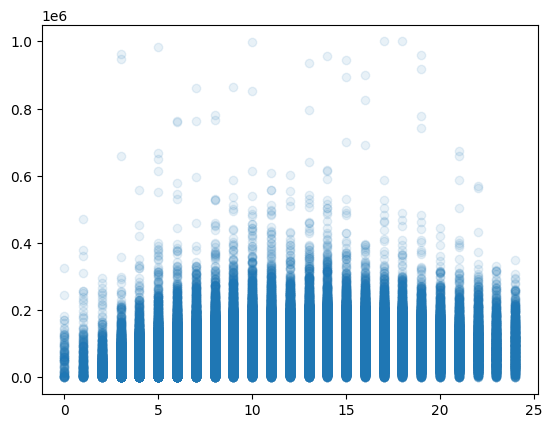

In [91] used 2.8 MiB RAM in 1.38s (system mean cpu 73%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 3992.3 MiB


In [91]:
plt.scatter(x=df_recent['years_old'], y=df_recent['test_mileage'], alpha=0.1)

# Can we load in the parquet data?

In [93]:
!ls ..

dask.ipynb    learnings.md  README.md		   scripts
data	      LICENSE	    requirements_pd15.txt  test_result.parquet
item.parquet  notebooks     requirements.txt
In [93] used 0.5 MiB RAM in 0.34s (system mean cpu 5%, single max cpu 22%), peaked 0.0 MiB above final usage, current RAM usage now 3622.8 MiB


In [110]:
parquet_test_result = "../test_result.parquet"
pl.read_parquet_schema(parquet_test_result + "/part.1.parquet")

{'test_id': Int64,
 'vehicle_id': Int64,
 'test_date': Datetime(time_unit='ns', time_zone=None),
 'test_class_id': Int64,
 'test_type': Utf8,
 'test_result': Utf8,
 'test_mileage': Int64,
 'postcode_area': Utf8,
 'make': Utf8,
 'model': Utf8,
 'colour': Utf8,
 'fuel_type': Utf8,
 'cylinder_capacity': Int64,
 'first_use_date': Datetime(time_unit='ns', time_zone=None),
 'path': Categorical}

In [110] used 0.0 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 5%), peaked 0.0 MiB above final usage, current RAM usage now 371.0 MiB


In [ ]:
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", n_rows=10, columns='make')
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", columns='make') # costs 9GB 5s, 639M rows
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", columns=['make', 'fuel_type']) # costs 17GB 10s
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", n_rows=1_000_000, ) # costs FAILS with:
# ComputeError(ErrString("cannot concat categoricals coming from a different source; consider setting a global StringCache"))', /home/runner/work/polars/polars/polars/polars-core/src/frame/mod.rs:923:36
cols = ['test_id', 'vehicle_id', 'test_date', 'test_class_id', 'test_type', 'test_result', 'test_mileage', 'postcode_area', 'make', 'model', 'colour', 'fuel_type', 'cylinder_capacity', 'first_use_date', ] # 'path'
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", n_rows=1_000_000, columns=cols) # costs 10GB 45s
#dfp = pl.read_parquet(parquet_test_result + "/*.parquet", n_rows=100_000_000, columns=cols) # costs 20GB 95s 
dfp = pl.read_parquet(parquet_test_result + "/*.parquet", columns=cols) # costs 20GB 95s 
dfp.shape
# why use_pyarrow=False?     Use pyarrow instead of the Rust native parquet reader. The pyarrow reader is more stable.


In [ ]:
dfp.head()